In [1]:
#Варіант21
from matplotlib import pyplot as plt
import numpy 
import math
from scipy import stats
from sklearn.preprocessing import StandardScaler
from seaborn import heatmap
from numpy import linalg 
#Завантаження данних в data_list з файлу А21.txt
way = "C:\\Users\\myshu\\Downloads\\Лабораторні2021\\A21.txt"
A_list = []
with open(way, 'r') as file:
    for line in file:
        A_list.append(line.split(","))
data_list = []
n = 12
i = 0
while i < n:
    temp_list = []
    for el in A_list:
        temp_list.append(float(el[i]))
    data_list.append(temp_list)
    i = i + 1

### A 
Знайти оцінки параметрів лінійної регресії $y=a+b*x$, методом найменших квадратів, де y та x - параметри, що мають найбільший за модулем коефіцієнт кореляції. Для даного варіанту найбільший за модулем коефіцієнт кореляції мають перший та четвертий стовбчик

Оцінка параметрів лінійної регресії 

In [2]:
X_list = data_list[0]
Y_list = data_list[3]
i = 0
test_list = []
sum_x = 0
sum_y = 0
sum_xy = 0
sum_x_square = 0
while i < len(X_list):
    test_list.append(1)
    sum_xy = sum_xy + X_list[i]*Y_list[i]
    sum_x = sum_x + X_list[i]
    sum_y = sum_y + Y_list[i]
    sum_x_square = sum_x_square + pow(X_list[i], 2)
    i = i + 1

In [3]:
X_array = numpy.array([test_list,X_list])
Y_array = numpy.array([Y_list])
xtx = X_array.dot(X_array.T)
xty = X_array.dot(Y_array.T)
xtx_inv = linalg.inv(xtx) 
a_list = xtx_inv.dot(xty)
print("a = ", a_list[0][0])
print("b = ", a_list[1][0])

a =  -1.9517731247409458
b =  -0.7643156756531773


Перевірка наявності викидів у регресії

In [4]:
a = a_list[0][0]
b = a_list[1][0]
i = 0 
e_i_list = []
while i < len(X_list):
    e_i = Y_list[i] - (a + b*X_list[i])
    e_i_list.append(e_i)
    i = i + 1
Si = []
sum_e_i = 0
sum_xi_x = 0 
i = 0
while i < len(X_list):
    sum_e_i = sum_e_i + pow(e_i_list[i],2)
    sum_xi_x = sum_xi_x + pow(X_array[1][i] - numpy.mean(X_array[1]),2)
    i = i + 1
i = 0
while i < len(X_list):
    Si.append((sum_e_i/len(X_list)-2)*(1 - 1/len(X_list) - pow((X_list[i] - numpy.mean(X_array[1])),2)/sum_xi_x))
    i = i + 1
i = 0
while i < len(X_list):
    if(e_i_list[i]/math.sqrt(Si[i]) > 4):
        print(str(i)+"-те значення - викид")
    i = i + 1

Викидів немає

Обчислення значимості коефіцієнта b

In [5]:
i = 0
S = 0
S_x = 0
S_y = 0
while i < len(X_list):
    S = S + pow(Y_list[i] - a - b*X_list[i], 2)
    S_x = S_x + pow(X_list[i] - numpy.mean(X_array[1]), 2)
    S_y = S_y + pow(Y_list[i] - numpy.mean(Y_array), 2)
    i = i + 1
Sb = math.sqrt(S/(len(X_list)-2))/(math.sqrt(S_x/len(X_list)-1)*math.sqrt(len(X_list)-1))
print(abs(b/Sb))

334.4949221296418


Коефіцієнт Стьюдента для 4998 степенів свободи = 3.3

Отримане значення є значно більшим ніж коефіціїнт Стьюдента. Отже коефіцієнт є значемим з достовірністю 0.998

Обчислення значимості коефіціїнта а

In [6]:
i = 0
Sa = math.sqrt(S/len(X_list)-2)*math.sqrt(1/len(X_list) + pow(numpy.mean(X_array[1]),2)/(len(X_list)-1)/S_x*(len(X_list)-1))
print(abs(a / Sa))

3.7390123958890835


Отримане значення є більшим ніж коефіціїнт Стьюдента. Отже коефіцієнт є значемим з достовірністю 0.998

Перевірка моделі на адекватність

In [7]:
(S/(len(X_list)-2))/(S_y/len(X_list)-1)

0.04276954930171348

Квантиль розподілу Фішера = 1.92. Отже модель адекватна з достовірністю 0.05

#### B
Обчислити залежну змінну за формулою $Y = a1*X1 + a2*X3 + a3*X5 $

Обчислення коефіцієнтів а1, а2, а3 відповідного значення Y \
$Y = a1*X1 + a2*X3 + a3*X5 $

In [8]:
a1 = 21 + numpy.random.rand()
a2 = -21/3 + numpy.random.rand()
a3 = 21/2 +numpy.random.rand()
X1_list = data_list[0]
X2_list = data_list[1]
X3_list = data_list[2]
X4_list = data_list[3]
X5_list = data_list[4]
X6_list = data_list[5]
i = 0
new_Y_list = []
while i < len(X_list):
    new_Y_list.append(a1*X1_list[i] + a2*X3_list[i] + a3*X5_list[i] + 2*(numpy.random.rand() - 0.5))
    i = i + 1
    

Обчислюємо вектор а

In [9]:
X_array = numpy.array([test_list,X1_list, X2_list, X3_list, X4_list, X5_list, X6_list])
Y_array = numpy.array([new_Y_list])
xtx = X_array.dot(X_array.T)
xty = X_array.dot(Y_array.T)
xtx_inv = linalg.inv(xtx) 
a_list = xtx_inv.dot(xty)
a_list


array([[-2.00449016e-02],
       [ 2.11044871e+01],
       [-2.23033925e-04],
       [-6.26538347e+00],
       [-2.24432966e-04],
       [ 1.11024861e+01],
       [-4.88877777e-06]])

Перевірка значущості регресії

In [10]:
a0 = a_list[0]
a1 = a_list[1]
a2 = a_list[2]
a3 = a_list[3]
a4 = a_list[4]
a5 = a_list[5]
a6 = a_list[6]
i = 0
i = 0
Xa_array = X_array.T.dot(a_list)
Y_Xa = []
while i < len(X_list):
    Y_Xa.append(Y_array[0][i] - Xa_array[i])
    i = i + 1
Y_Xa_array = numpy.array(Y_Xa)
Qr = 0
Q = 0
i = 0
while i < len(X_list):
    Q = Q + pow(Y_array[0][i] - Xa_array[i],2)
    Qr = Qr + pow(Xa_array[i] - numpy.mean(Y_array[0]),2)
    i = i + 1
print("F = ", Qr/7/Q*(5000-7))

F =  [1.10868134e+11]


F > Fкр. Отже нульва гіпотза не виконується

Перевірка знучущості окремих коефіцієнтів регресії

In [11]:
s = math.sqrt(1/(5000-7))*Q
X = X_array.dot(X_array.T)
X = linalg.inv(X)
j = 0
while j < 7:
    print("Значущість ",j,"-го коефіцієнта = ",a_list[j][0]/(s*math.sqrt(X[j][j]))[0])
    j = j + 1


Значущість  0 -го коефіцієнта =  -0.03611004771357635
Значущість  1 -го коефіцієнта =  256.33599467509356
Значущість  2 -го коефіцієнта =  -0.005300983820958229
Значущість  3 -го коефіцієнта =  -135.02835438267533
Значущість  4 -го коефіцієнта =  -0.0028430437110046982
Значущість  5 -го коефіцієнта =  147.54412667194248
Значущість  6 -го коефіцієнта =  -0.0001059187015875171


Критичне значення коефіцієнта Стьюдента = 1.96, для а = 0.05. Отже, коефіцієнти регресії a1, a3, a5 є значущими, а коефіцієнти a0, a2, a4, a6 - незначущі

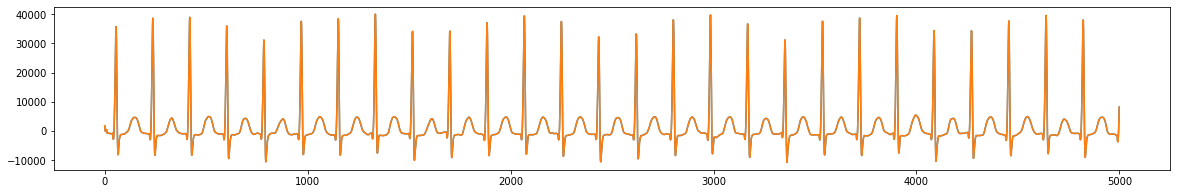

In [12]:
ax = plt.subplots(figsize=(20,3))
ax = plt.plot(Y_array[0])
ax = plt.plot(Xa_array)

На графіку зображено синім коліром - графік залежної змінної, помаранчевим - графік апроксимації лінійною моделлю

#### C
Провести апроксимацію емпіричних залежностей тригонометричними многочленами, для різної кількості гармонік r=100, r=1000, r=n/2
r = 100

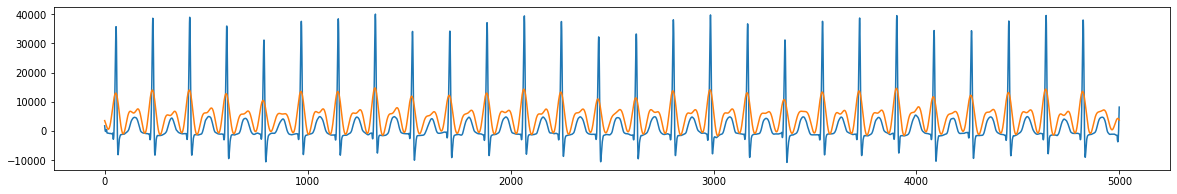

In [13]:
Y_list = new_Y_list
r = 100
k = 0
a0 = 0
while k < len(X_list):
    a0 = a0 + Y_list[k]
    k = k + 1
a0 = a0/len(X_list) 
    
    
k = 0
am_list = []
bm_list = []
i = 0
while i < r:
    am = 0
    bm = 0
    k = 0
    while k < len(X_list):
        am = am + Y_list[k]*math.cos(2*math.pi*k*i/len(X_list)) 
        bm = bm + Y_list[k]*math.sin(2*math.pi*k*i/len(X_list)) 
        k = k + 1
    am_list.append(am*2/len(X_list))
    bm_list.append(bm*2/len(X_list))
    i = i + 1
i = 0
Z_list = []
while i < 5000:
    k = 0
    a = 0
    while k < r:
        a = a + am_list[k]*math.cos(2*math.pi*k*i/5000)
        k = k + 1
    k = 0
    b = 0
    while k < r:
        b = b + bm_list[k]*math.sin(2*math.pi*k*i/5000)
        k = k + 1
    Z_list.append(a0+a+b)
    i = i + 1
#print(am_list)
#print(bm_list)
ax = plt.subplots(figsize=(20,3))
ax = plt.plot(Y_list)
ax = plt.plot(Z_list)

На графіку зображено синім коліром - графік залежної змінної, помаранчевим - графік апроксимації лінійною моделлю

r = 1000

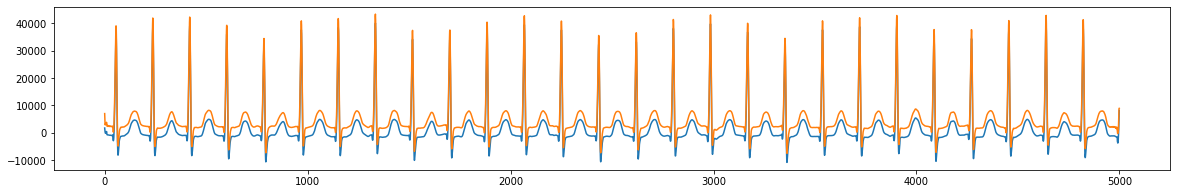

In [14]:
r = 1000
k = 0
a0 = 0
while k < len(X_list):
    a0 = a0 + Y_list[k]
    k = k + 1
a0 = a0/len(X_list) 
    
    
k = 0
am_list = []
bm_list = []
i = 0
while i < r:
    am = 0
    bm = 0
    k = 0
    while k < len(X_list):
        am = am + Y_list[k]*math.cos(2*math.pi*k*i/len(X_list)) 
        bm = bm + Y_list[k]*math.sin(2*math.pi*k*i/len(X_list)) 
        k = k + 1
    am_list.append(am*2/len(X_list))
    bm_list.append(bm*2/len(X_list))
    i = i + 1
i = 0
Z_list = []
while i < 5000:
    k = 0
    a = 0
    while k < r:
        a = a + am_list[k]*math.cos(2*math.pi*k*i/5000)
        k = k + 1
    k = 0
    b = 0
    while k < r:
        b = b + bm_list[k]*math.sin(2*math.pi*k*i/5000)
        k = k + 1
    Z_list.append(a0+a+b)
    i = i + 1
#print(am_list)
#print(bm_list)
ax = plt.subplots(figsize=(20,3))
ax = plt.plot(Y_list)
ax = plt.plot(Z_list)

На графіку зображено синім коліром - графік залежної змінної, помаранчевим - графік апроксимації лінійною моделлю

r = 2500

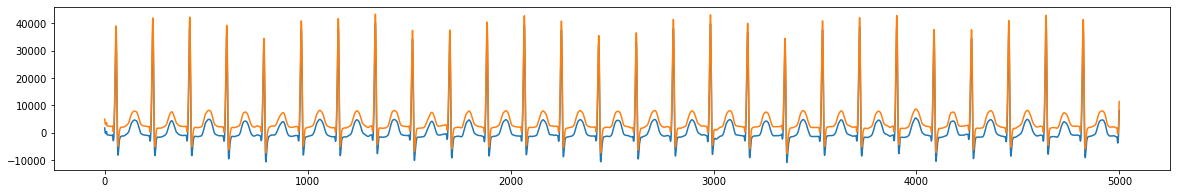

In [15]:
r = 2500
k = 0
a0 = 0
while k < len(X_list):
    a0 = a0 + Y_list[k]
    k = k + 1
a0 = a0/len(X_list) 
    
    
k = 0
am_list = []
bm_list = []
i = 0
while i < r:
    am = 0
    bm = 0
    k = 0
    while k < len(X_list):
        am = am + Y_list[k]*math.cos(2*math.pi*k*i/len(X_list)) 
        bm = bm + Y_list[k]*math.sin(2*math.pi*k*i/len(X_list)) 
        k = k + 1
    am_list.append(am*2/len(X_list))
    bm_list.append(bm*2/len(X_list))
    i = i + 1
i = 0
Z_list = []
while i < 5000:
    k = 0
    a = 0
    while k < r:
        a = a + am_list[k]*math.cos(2*math.pi*k*i/5000)
        k = k + 1
    k = 0
    b = 0
    while k < r:
        b = b + bm_list[k]*math.sin(2*math.pi*k*i/5000)
        k = k + 1
    Z_list.append(a0+a+b)
    i = i + 1
#print(am_list)
#print(bm_list)
ax = plt.subplots(figsize=(20,3))
ax = plt.plot(Y_list)
ax = plt.plot(Z_list)

На графіку зображено синім коліром - графік залежної змінної, помаранчевим - графік апроксимації лінійною моделлю